# Tracy Michaels

## CSC 4740 Data Mining - Assignment 3
***
### Implementing a PageRank Algorithm
***
#### What is PageRank?
> Created for google by co-founder Larry Page. It is used to rank the importance of a web page which directs the search results in their search engine. PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.
#### Power Iteration Method:
For this assignment I will focus on the power iteration method of determining the PageRank of a given set of nodes in the following adjancy list: (edges represent by which node(s) it is connecting)
> 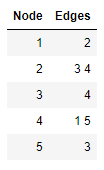

represented by the following graph:
> 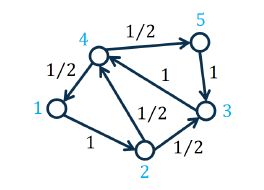

Computing the PageRank value of each node will be done with the following equation:
> 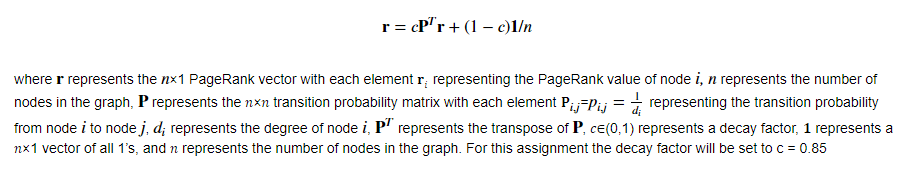

Expected results:
> 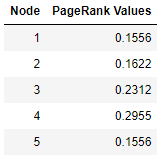
***

### Implementaion: 

In [1]:
import collections
import pprint as pp

# worker method
def getContributions(d):
    for key in d:
        for i in d[key][0]:
            yield(i, d[key][1]/len(d[key][0]))

# import file as list
f = open("01AdjacencyList.txt", "r")
# each line in file to a list
adj_ls = f.read().splitlines()
f.close()

print("Input list: ")
pp.pprint(adj_ls)

# each list value to its own list
adj_ls = [i.split() for i in adj_ls]
# print(adj_ls) #debug

# parse ints
adj_ls = [[int(j) for j in i] for i in adj_ls]
# print(adj_ls) #debug

# separate node from paths
adj_ls = [[i[0], i[1:]] for i in adj_ls]
# print(adj_ls) #debug

num_nodes = len(adj_ls)
print(f'Number of Nodes: {num_nodes}')

# initalize values
init_vals = [(i[0], 1/num_nodes) for i in adj_ls]
# print(init_vals) #debug

#convert each to dict
adj_dict = dict(adj_ls)
val_dict = dict(init_vals)

print
# 30 iterations of power iteration method
for i in range(30):
    print(f'iteration: {i}')
    # join init values with list
    join_dict = dict((k, (adj_dict[k], val_dict[k])) for k in adj_dict)
#     pp.pprint(join_dict) #debug

    # contributions
    cont_ls = list(getContributions(join_dict))
#     pp.pprint(cont_ls) #debug

    # consolidate by key into dict
    cons_dict = {k:0 for k,v in cont_ls}
    for k,v in cont_ls:
        cons_dict[k] += v
#     pp.pprint(cons_dict) #debug

    # rank values
    for k in cons_dict:
        val_dict[k] = (cons_dict[k]*0.85)+(.15/num_nodes)
    pp.pprint(val_dict)
    
print()
print("final result: ")

pp.pprint(val_dict)



Input list: 
['1 2', '2 3 4', '3 4', '4 1 5', '5 3']
Number of Nodes: 5
iteration: 0
{1: 0.115, 2: 0.2, 3: 0.28500000000000003, 4: 0.28500000000000003, 5: 0.115}
iteration: 1
{1: 0.151125,
 2: 0.12775,
 3: 0.21275000000000002,
 4: 0.35724999999999996,
 5: 0.151125}
iteration: 2
{1: 0.18183124999999997,
 2: 0.15845625,
 3: 0.21275000000000002,
 4: 0.26513125000000004,
 5: 0.18183124999999997}
iteration: 3
{1: 0.14268078125,
 2: 0.18455656249999997,
 3: 0.25190046874999994,
 4: 0.27818140625,
 5: 0.14268078125}
iteration: 4
{1: 0.14822709765624997,
 2: 0.1512786640625,
 3: 0.229715203125,
 4: 0.3225519374999999,
 5: 0.14822709765624997}
iteration: 5
{1: 0.16708457343749994,
 2: 0.15599303300781248,
 3: 0.22028646523437498,
 4: 0.2895513548828125,
 5: 0.16708457343749994}
iteration: 6
{1: 0.1530593258251953,
 2: 0.17202188742187494,
 3: 0.23831892645019526,
 4: 0.283540534477539,
 5: 0.1530593258251953}
iteration: 7
{1: 0.1505047271529541,
 2: 0.160100426951416,
 3: 0.23320972910571283,
 

### Summary:
As the final result (shown below) matches the expected output meaning the implementation was successful
> final result:  

> 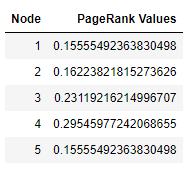